# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [26]:
# Import libraries

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Read in the data set

df = pd.read_csv("ames.csv")
print(df.head())

   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7           2          528      215000  
1   

In [4]:
# Clean and pre-process the data if neccessary

columns = ['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']
df[columns].isnull().sum()
df = df.dropna(subset = columns)
print(df[columns].isnull().sum())

Gr_Liv_Area    0
Garage_Area    0
Sale_Price     0
dtype: int64


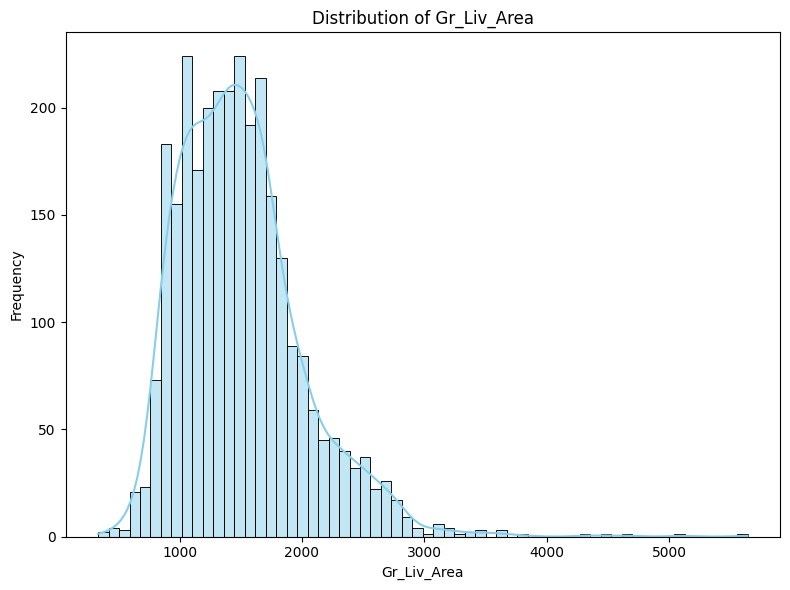

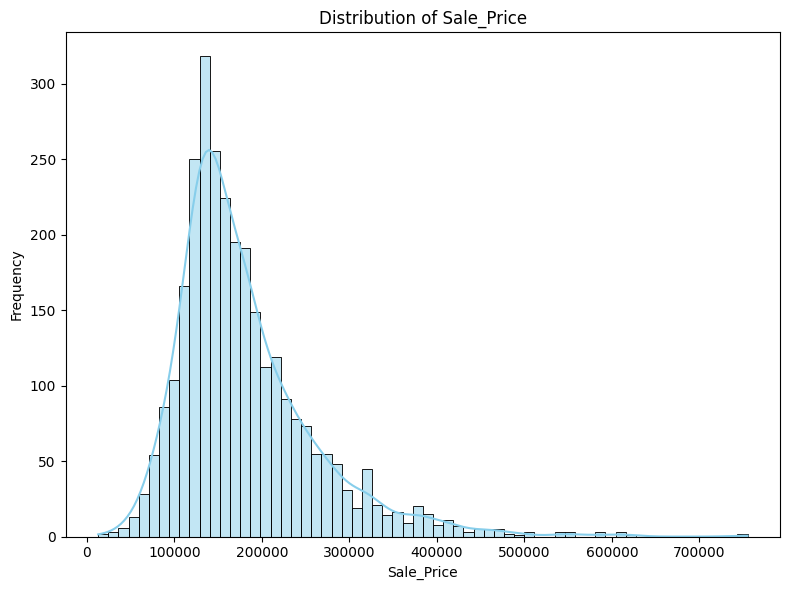

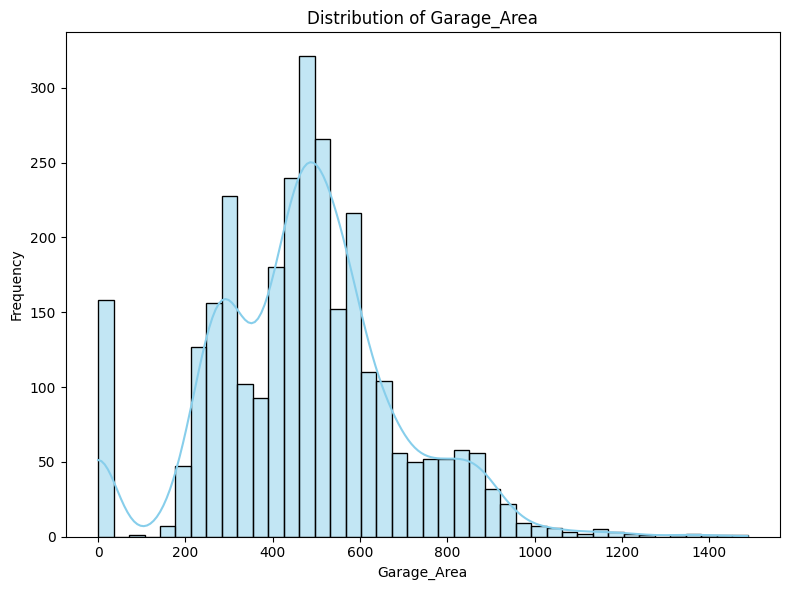

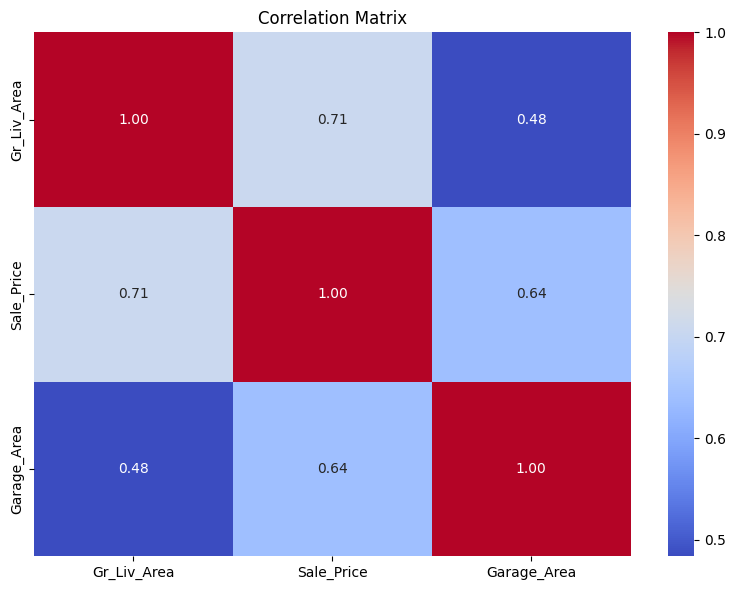

In [15]:
# Explore the data with visualisations such as histograms and correlation matrices

# Select only relevant columns
df = df[['Gr_Liv_Area', 'Sale_Price', 'Garage_Area']]

# Distribution Plots

for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Correlation Matrices

plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
plt.close()


In [16]:
# Split the independent variables from the dependent variable

X = df[['Gr_Liv_Area', 'Garage_Area']]
y= df['Sale_Price']
print(X,y)

      Gr_Liv_Area  Garage_Area
0            1656          528
1             896          730
2            1329          312
3            2110          522
4            1629          482
...           ...          ...
2925         1003          588
2926          902          484
2927          970            0
2928         1389          418
2929         2000          650

[2930 rows x 2 columns] 0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: Sale_Price, Length: 2930, dtype: int64


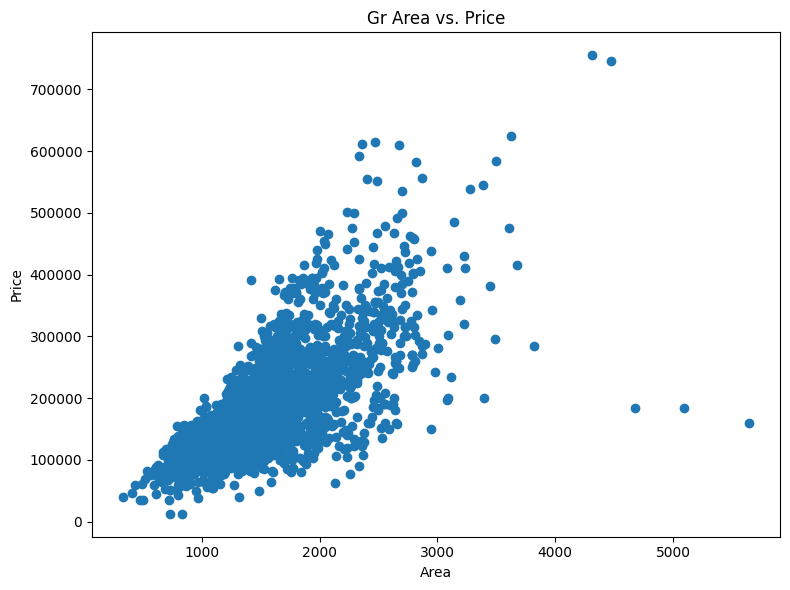

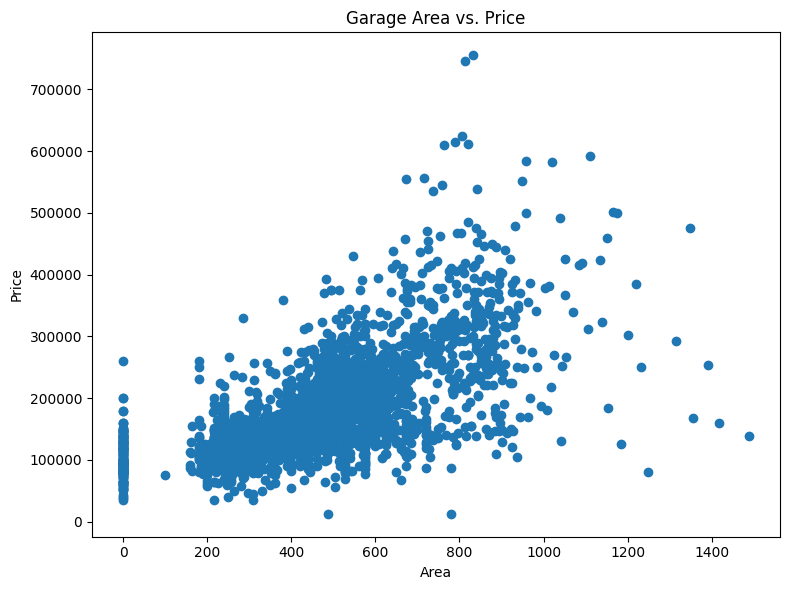

In [19]:
# Explore relationships between the independent and dependent variables

# Gr_Liv_Area vs Price

plt.figure(figsize=(8,6))
plt.scatter(X['Gr_Liv_Area'], y)
plt.title('Gr Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
plt.close()

# Garage_Area vs Price

plt.figure(figsize=(8,6))
plt.scatter(X['Garage_Area'], y)
plt.title('Garage Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
plt.close()



In [22]:
# Create a training and test set with a 75:25 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)
print(f"X training set: \n {X_train}")
print(f"X test set: \n {X_test}")
print(f"Y training set: \n {y_train}")
print(f"Y test set: \n {y_test}")

X training set: 
       Gr_Liv_Area  Garage_Area
938          1680          540
1477         1234          484
1371         1054          240
2432         1414          403
1391         1383          354
...           ...          ...
1921         1056          260
2652         1566          450
1786         1588          825
1094         1490          388
1496         1132          451

[2197 rows x 2 columns]
X test set: 
       Gr_Liv_Area  Garage_Area
824          1838          524
945           810          280
1530         1603          599
559           912          300
2074         1325          576
...           ...          ...
24           1078          500
2710          934          336
1897         1327          624
1481          848          420
234          1610          480

[733 rows x 2 columns]
Y training set: 
 938     222000
1477    179900
1371    124000
2432    178000
1391    165000
         ...  
1921    139400
2652    139000
1786    227000
1094    184000
1496   

In [23]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'


multiple_reg = LinearRegression()
multiple_reg.fit(X_train,y_train)

LinearRegression()

In [28]:
# Print the model intercept and coefficients

print("Model Coefficients:", multiple_reg.coef_)
print("Intercept:", multiple_reg.intercept_)


Model Coefficients: [ 83.03398029 144.48608256]
Intercept: -12050.057806888246


In [34]:
# Generate predictions for the test set

y_pred = multiple_reg.predict(X_test)

[216277.10523654  95663.56934901 207600.57605995 107022.75699024
 181193.94963937 135648.5939989   76664.55983534 174329.68400486
 223940.5960433  405714.45734744 112899.88124485 169707.86857637
  37687.2963889  138431.44978824 141498.326471   212272.06083441
 175741.26166985 350907.61182013 207591.47262367 160554.45102699
 181767.20906697 154063.41996143 100757.50677396 194083.97777563
 160620.58803193 119044.39578657 186551.63597692 214817.51596551
 183140.30787858 194342.26462646 132777.85637926 158853.8197232
  59691.30116666 217119.14632212 175370.6468953  202110.71913425
  83605.08749118 190713.56342969 139506.90231483 229730.77857406
 146062.59754078 130436.2523767  165872.18566662 125756.19690406
 188580.33251098 126784.84430009 308065.18662512 183013.06661409
 306891.62383014 112588.97935898 203048.00627281 252388.39743969
 215688.58462547 217491.58178393 144603.43758613 164802.62451818
 207708.13760734 180143.45399627  73059.77199391 173207.69271677
 146900.91577817 147897.32

In [36]:
# Evaluate the model

print("R² Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:,.2f}")

R² Score: 0.6188246805586728
RMSE: $49,737.36


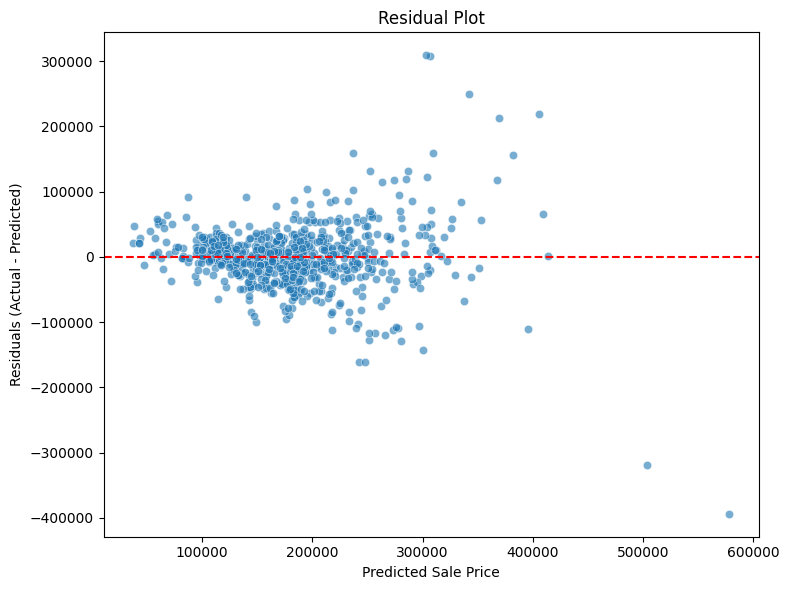

In [33]:
# Generate a plot

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [42]:
# Print the coefficients

print("Intercept:", multiple_reg.intercept_)
print("Coefficient for Gr_Liv_Area:", multiple_reg.coef_[0])
print("Coefficient for Garage_Area:", multiple_reg.coef_[1])

Intercept: -12050.057806888246
Coefficient for Gr_Liv_Area: 83.03398029346414
Coefficient for Garage_Area: 144.48608256496962


**Interpret coefficients in the context of the prediction:**
Intercept = -12,050.06

This is the predicted sale price when both Gr_Liv_Area and Garage_Area are 0.

It has no practical interpretation in the real world (because no house has 0 sqft living or garage area), but it’s needed mathematically to anchor the model.

Gr_Liv_Area Coefficient = 83.03

For every additional 1 square foot of above-ground living area, the model predicts the house price increases by about $83.03, holding garage area constant.

Garage_Area Coefficient = 144.49

For every additional 1 square foot of garage area, the model predicts the house price increases by about $144.49, holding living area constant.

**Summarise findings**

The multiple linear regression model uses two predictors:
Gr_Liv_Area (above-ground living area) and Garage_Area (garage size) to estimate Sale_Price (house price).

Model Coefficients:

Intercept: -$12,050.06 – not meaningful in real-world terms but essential for the regression equation.

Gr_Liv_Area: Each additional square foot of living space increases the predicted price by approximately $83.03.

Garage_Area: Each additional square foot of garage space increases the predicted price by approximately $144.49.

Interpretation:

Both variables positively influence house price.

Garage area has a greater impact per square foot than living area in this model, indicating that larger garages may be highly valued in this dataset.

Conclusion:

The model reveals clear, positive relationships between house size features and price, especially highlighting the strong influence of garage space.

This insight can be useful for homebuyers, sellers, or developers focusing on features that most affect property value.